In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Import Libraries
import numpy as np
import os
import tensorflow as tf
from PIL import Image, ImageFile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16

# Allow loading of images even if partially corrupted
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Define a function to scan and remove invalid image files
def clean_invalid_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()
            except (IOError, SyntaxError):
                print(f"Removing corrupted file: {file_path}")
                os.remove(file_path)



# Setting up the base directory
basedir = "/kaggle/input/yoga-pose-image-classification-dataset/dataset"

# Detect class names from subdirectory names
classes = sorted([folder for folder in os.listdir(basedir) if os.path.isdir(os.path.join(basedir, folder))])

# Clean invalid images in each class folder
clean_invalid_images(basedir)






In [2]:
# Set up data generators for splitting and loading
data_gen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)  # 20% for validation

train_generator = data_gen.flow_from_directory(basedir, target_size=(300, 300),
                                               batch_size=32, class_mode='categorical',
                                               classes=classes, subset='training')
valid_generator = data_gen.flow_from_directory(basedir, target_size=(300, 300),
                                               batch_size=32, class_mode='categorical',
                                               classes=classes, subset='validation')



Found 4835 images belonging to 107 classes.
Found 1156 images belonging to 107 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

**Resnet50 Model without pcustomized weights**

In [4]:
from tensorflow.keras.applications import ResNet50

In [26]:
# Load pre-trained VGG16 model without the top layer


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Add custom layers for classification
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(len(classes), activation='softmax')(x)  # Output layer with number of classes

# Create final model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2, from_logits=True),
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 306, 306,  │          0 │ input_layer_7[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 150, 150,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 150, 150,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 150, 150,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 152, 152,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 75, 75,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 75, 75,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 75, 75,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 75, 75,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 75, 75,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 75, 75,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 75, 75,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 75, 75,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 75, 75,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 75, 75,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 75, 75,    │      1,024 │ conv2_block1_3_c

 Total params: 49,816,043 (190.03 MB)

 Trainable params: 49,762,923 (189.83 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [15]:
hist2 = model.fit(train_generator, validation_data=valid_generator, epochs=12)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(valid_generator)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

Epoch 1/12


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:560: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730996864.183395     149 service.cc:145] XLA service 0x7fc7d8004250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730996864.183463     149 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1730996893.682

 19/152 ━━━━━━━━━━━━━━━━━━━━ 39s 298ms/step - accuracy: 0.0104 - loss: 5.8305

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 24/152 ━━━━━━━━━━━━━━━━━━━━ 2:16 1s/step - accuracy: 0.0106 - loss: 5.7140  

I0000 00:00:1730996918.338645     151 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_33', 96 bytes spill stores, 96 bytes spill loads



152/152 ━━━━━━━━━━━━━━━━━━━━ 125s 487ms/step - accuracy: 0.0135 - loss: 4.9781 - val_accuracy: 0.0069 - val_loss: 6.0441
Epoch 2/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 54s 341ms/step - accuracy: 0.1620 - loss: 4.0531 - val_accuracy: 0.0095 - val_loss: 12.4066
Epoch 3/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 51s 322ms/step - accuracy: 0.5031 - loss: 3.0686 - val_accuracy: 0.0156 - val_loss: 12.6886
Epoch 4/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 51s 322ms/step - accuracy: 0.7953 - loss: 2.3919 - val_accuracy: 0.0311 - val_loss: 11.3847
Epoch 5/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 50s 320ms/step - accuracy: 0.9208 - loss: 2.0872 - val_accuracy: 0.1099 - val_loss: 6.2990
Epoch 6/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 51s 325ms/step - accuracy: 0.9567 - loss: 1.9733 - val_accuracy: 0.3806 - val_loss: 3.5666
Epoch 7/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 51s 323ms/step - accuracy: 0.9635 - loss: 1.9126 - val_accuracy: 0.4628 - val_loss: 3.3154
Epoch 8/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 51s 325ms/step - accuracy: 0.9751 - loss: 1.8654 -

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

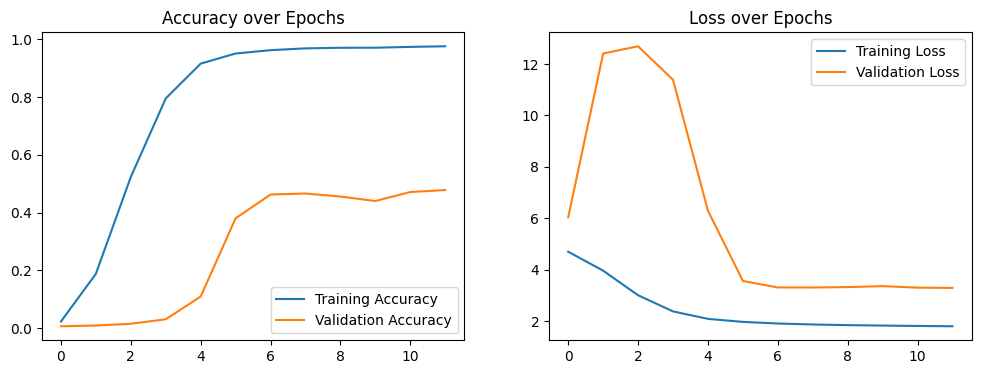

In [18]:
# Visualizing training results
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(hist2.history['accuracy'], label = 'Training Accuracy')
plt.plot(hist2.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(hist2.history['loss'], label = 'Training Loss')
plt.plot(hist2.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

**Xception model without customized weights**

In [4]:
# Load pre-trained Xception model without the top layer
from tensorflow.keras.applications import Xception

base_model = Xception(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Add custom layers for classification
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(len(classes), activation='softmax')(x)  # Output layer with number of classes

# Create final model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2, from_logits=True),
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add[0][0]       

 Total params: 47,089,811 (179.63 MB)

 Trainable params: 47,035,283 (179.43 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [6]:
hist3 = model.fit(train_generator, validation_data=valid_generator, epochs=12)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(valid_generator)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

Epoch 1/12


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:560: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1731164555.288676     105 service.cc:145] XLA service 0x7bbf9c001de0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731164555.288755     105 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1731164587.567

 11/152 ━━━━━━━━━━━━━━━━━━━━ 4:00 2s/step - accuracy: 0.0053 - loss: 4.7878 

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 141s 615ms/step - accuracy: 0.0233 - loss: 4.6750 - val_accuracy: 0.0969 - val_loss: 4.4231
Epoch 2/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 77s 492ms/step - accuracy: 0.1322 - loss: 4.2533 - val_accuracy: 0.1843 - val_loss: 4.1374
Epoch 3/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 76s 491ms/step - accuracy: 0.2638 - loss: 3.8420 - val_accuracy: 0.2682 - val_loss: 3.8552
Epoch 4/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 82s 490ms/step - accuracy: 0.4110 - loss: 3.4173 - val_accuracy: 0.3339 - val_loss: 3.6363
Epoch 5/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 76s 491ms/step - accuracy: 0.5275 - loss: 3.0779 - val_accuracy: 0.3997 - val_loss: 3.4433
Epoch 6/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 76s 490ms/step - accuracy: 0.6560 - loss: 2.7522 - val_accuracy: 0.4377 - val_loss: 3.2882
Epoch 7/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 76s 492ms/step - accuracy: 0.7327 - loss: 2.5417 - val_accuracy: 0.4550 - val_loss: 3.1984
Epoch 8/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 77s 493ms/step - accuracy: 0.8066 - loss: 2.3669 - va

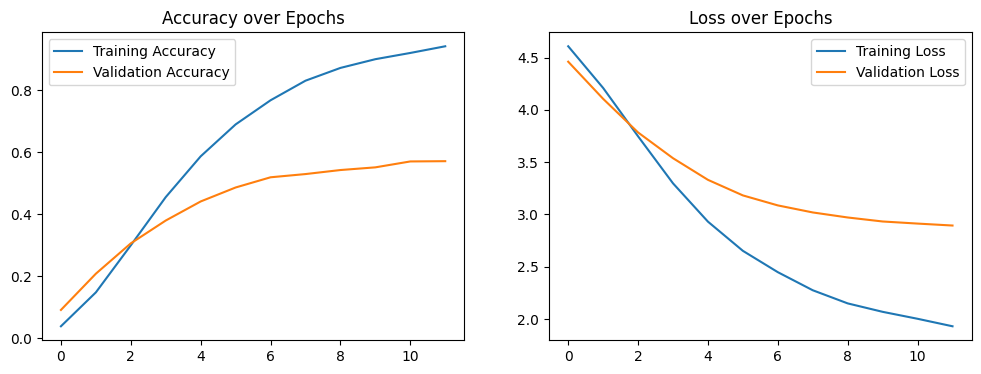

In [9]:
# Visualizing training results
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(hist3.history['accuracy'], label = 'Training Accuracy')
plt.plot(hist3.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(hist3.history['loss'], label = 'Training Loss')
plt.plot(hist3.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

**Xception model with pretrained weights (Best compared to above two)**

In [9]:
# Load pre-trained Xception model without the top layer
from tensorflow.keras.applications import Xception

base_model = Xception(weights='/kaggle/input/weights-trained', include_top=False, input_shape=(300, 300, 3))

# Add custom layers for classification
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(len(classes), activation='softmax')(x)  # Output layer with number of classes

# Create final model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2, from_logits=True),
              metrics=['accuracy'])

# Summary of the model
model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 74, 74,    │        512 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_24 (Add)        │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add_24[0][0]    

 Total params: 47,089,811 (179.63 MB)

 Trainable params: 47,035,283 (179.43 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [10]:
hist4 = model.fit(train_generator, validation_data=valid_generator, epochs=12)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(valid_generator)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

Epoch 1/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 111s 569ms/step - accuracy: 0.0243 - loss: 4.6857 - val_accuracy: 0.0839 - val_loss: 4.4508
Epoch 2/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 76s 490ms/step - accuracy: 0.1230 - loss: 4.2642 - val_accuracy: 0.1886 - val_loss: 4.1045
Epoch 3/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 76s 491ms/step - accuracy: 0.2774 - loss: 3.7772 - val_accuracy: 0.2785 - val_loss: 3.7813
Epoch 4/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 82s 490ms/step - accuracy: 0.4423 - loss: 3.3018 - val_accuracy: 0.3651 - val_loss: 3.5250
Epoch 5/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 76s 491ms/step - accuracy: 0.5960 - loss: 2.9186 - val_accuracy: 0.4386 - val_loss: 3.3202
Epoch 6/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 76s 491ms/step - accuracy: 0.6932 - loss: 2.6438 - val_accuracy: 0.4810 - val_loss: 3.1940
Epoch 7/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 77s 491ms/step - accuracy: 0.7885 - loss: 2.3966 - val_accuracy: 0.5000 - val_loss: 3.1095
Epoch 8/12
152/152 ━━━━━━━━━━━━━━━━━━━━ 76s 491ms/step - accuracy: 0.8428 - loss: 

In [11]:
model.save('/kaggle/working/yoga_pose_model_saved.h5')  # Adjust the path as needed
print("Model saved successfully!")

Model saved successfully!


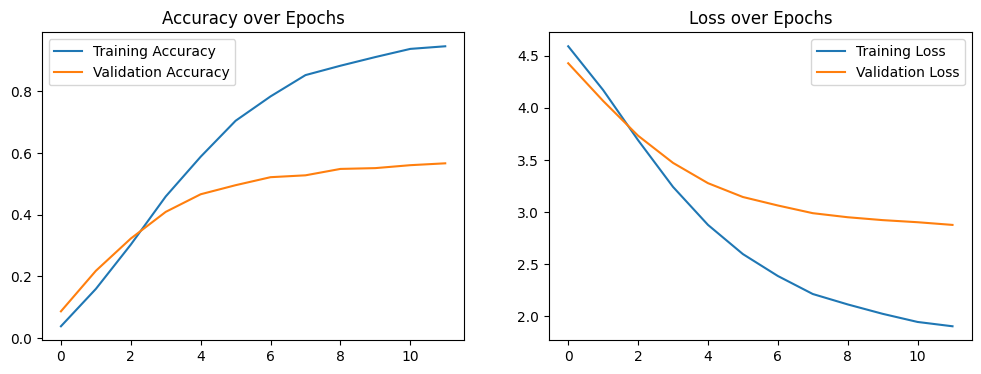

In [10]:
# Visualizing training results
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(hist4.history['accuracy'], label = 'Training Accuracy')
plt.plot(hist4.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(hist4.history['loss'], label = 'Training Loss')
plt.plot(hist4.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

**Some correctly and incorrectly predicted poses in trained model**

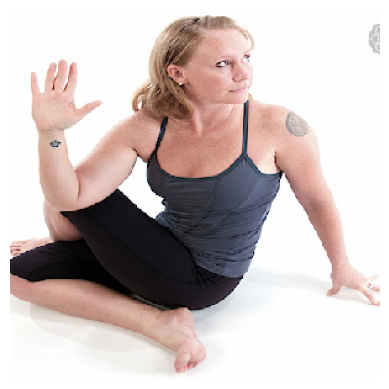

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Yoga Pose: ardha matsyendrasana


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

# Load the pre-trained model
model = load_model('/kaggle/working/yoga_pose_model_saved.h5')  # Replace with the actual path to your model

# Define the mapping of class indices to yoga pose names
class_labels = sorted(os.listdir('/kaggle/input/yoga-pose-image-classification-dataset/dataset'))  # Replace with your dataset path

def predict_yoga_pose(img_path):
    # Load and display the image
    img = image.load_img(img_path, target_size=(300, 300))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Preprocess the image
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image (if model was trained with normalization)
    
    # Pass the image to the model for prediction
    prediction = model.predict(img_array)
    
    # Get the predicted class index and label
    predicted_index = np.argmax(prediction, axis=1)[0]
    predicted_label = class_labels[predicted_index]
    
    # Print the result
    print(f"Predicted Yoga Pose: {predicted_label}")

# Example usage
img_path1 = "/kaggle/input/yoga-pose-image-classification-dataset/dataset/ardha matsyendrasana/14-0.png"  # Replace with the actual path
predict_yoga_pose(img_path)


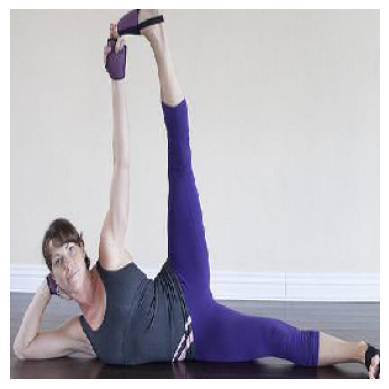

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Yoga Pose: anantasana


In [17]:
img_path2 = "/kaggle/input/yoga-pose-image-classification-dataset/dataset/anantasana/15-0.png"  # Replace with the actual path
predict_yoga_pose(img_path2)

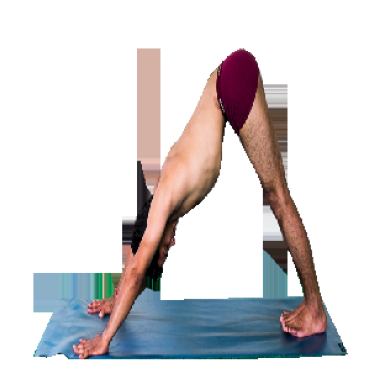

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Yoga Pose: adho mukha svanasana


In [20]:
img_path2 = "/kaggle/input/yoga-pose-image-classification-dataset/dataset/adho mukha svanasana/1. 1.png"  # Replace with the actual path
predict_yoga_pose(img_path2)

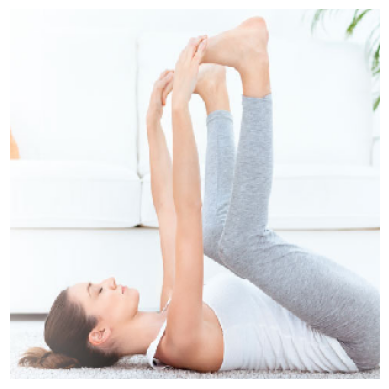

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Yoga Pose: ananda balasana


In [18]:
img_path2 = "/kaggle/input/yoga-pose-image-classification-dataset/dataset/ananda balasana/13-0.png"  # Replace with the actual path
predict_yoga_pose(img_path2)

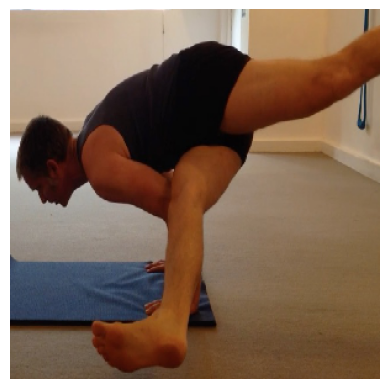

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Yoga Pose: virabhadrasana iii


In [19]:
img_path2 = "/kaggle/input/yoga-pose-image-classification-dataset/dataset/eka pada koundinyanasana i/20-0.png"  # Replace with the actual path
predict_yoga_pose(img_path2)